In [121]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [167]:
data = r"D:\parameter_studies\fertilizer-consumption-usda.csv"  # https://ourworldindata.org/fertilizers
df = pd.read_csv(data)
fertilizers = df.loc[df['Entity'] == 'World']
# fill values from 1800 to 1960 with 0
for year in range(1961, 1850, -1):
    new_row = pd.DataFrame({'Year': year, 'Entity': 'World', 'fertilizer_quantity': np.nan}, index=[year])
    fertilizers = pd.concat([new_row, fertilizers])

In [168]:
data = r"D:\parameter_studies\population.csv"  # https://ourworldindata.org/grapher/population
df = pd.read_csv(data)
population = df.loc[(df['Entity'] == 'World') & (df['Year'] > 1850) & (df['Year'] < 2020)]

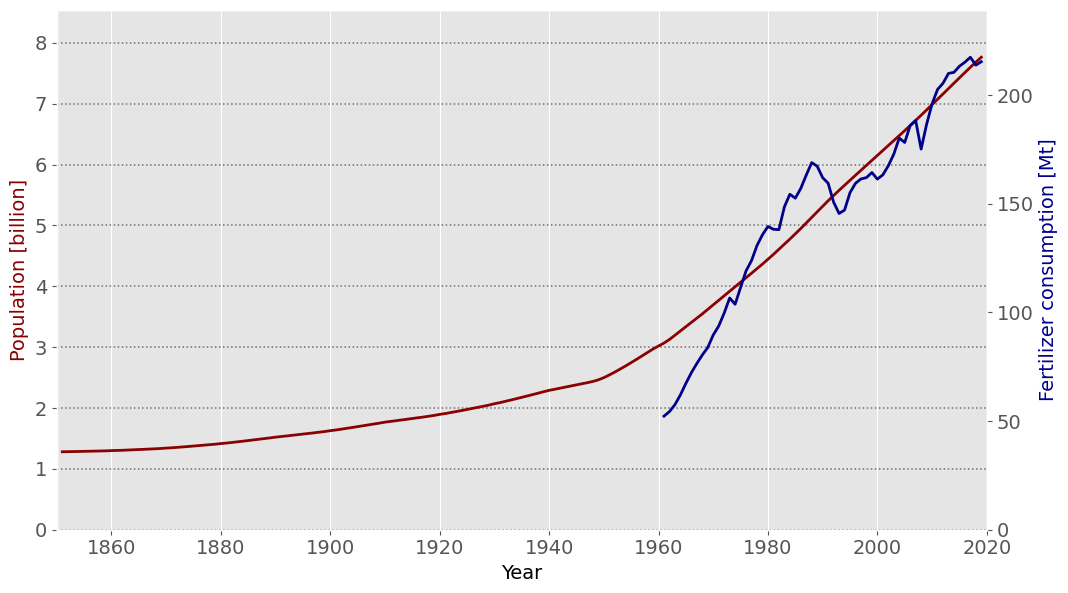

In [224]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif'})

fig1 = plt.figure(figsize=(12, 6.75))
ax1 = fig1.add_subplot(axisbelow=True)
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
ax1.set_xlim([1850, 2020])

ax2.plot(fertilizers['Year'], 1e-6*fertilizers['fertilizer_quantity'], color = 'darkblue', linewidth = 2)
ax1.plot(population['Year'], 1e-9*population['Population (historical estimates)'], color = 'darkred', linewidth = 2)

ax2.set_ylim([0, 1.1e-6*fertilizers['fertilizer_quantity'].max()])
ax1.set_ylim([0, 1.1e-9*population['Population (historical estimates)'].max()])

ax2.set_ylabel('Fertilizer consumption [Mt]', color='darkblue')
ax1.set_ylabel('Population [billion]', color='darkred')

ax1.grid(color='k', axis='y', linestyle=':', linewidth=1.1, alpha=0.5)
ax2.grid(color='k', axis='y', linestyle=':', linewidth=1.1, alpha=0.0)